In [26]:
# this is just a script to plot the figures that will be used in the paper
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

fitness_names = ["mean_soja", "std_soja", "total_surface"]
names2labels = {fitness_names[0] : "Total soybean yield over 10 years (tons)",
                fitness_names[1] : "Inter-year variance (tons)",
                fitness_names[2] : "Total surface allocated to soybeans (ha)"}

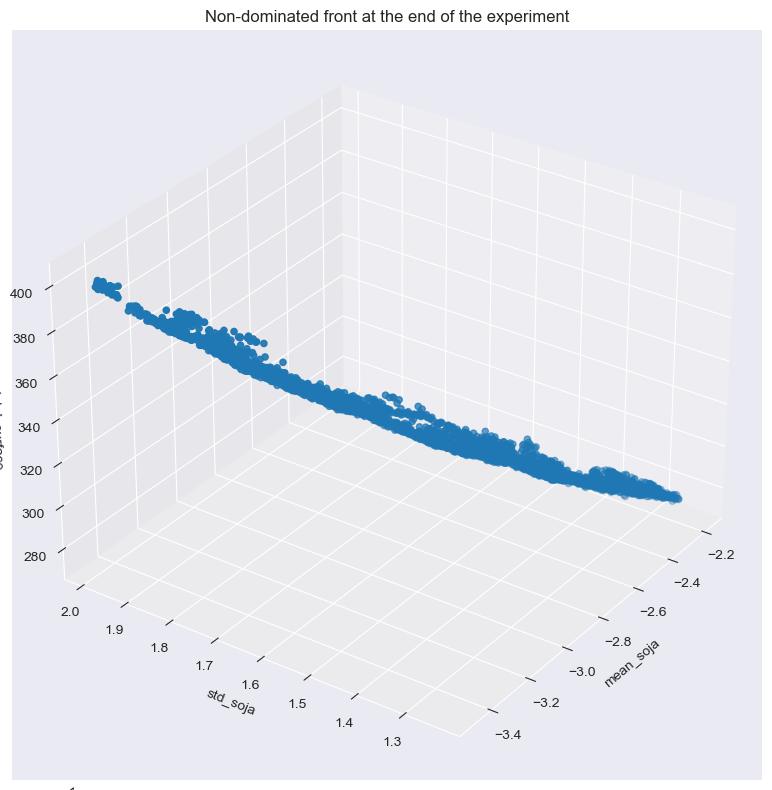

In [19]:
# let's start with something simple: we plot the final Pareto front from one of the experiments
data_file = "../results/2024-01-19-soja-allocation-3-objectives/42-archive-generation-520.csv"
df = pd.read_csv(data_file)

x = df[fitness_names[0]].values
y = df[fitness_names[1]].values
z = df[fitness_names[2]].values

fig = plt.figure(figsize=(10, 8))
axes = plt.axes(projection="3d")
axes.scatter3D(x, y, z)

axes.set_title("Non-dominated front at the end of the experiment")
axes.set_xlabel(fitness_names[0])
axes.set_ylabel(fitness_names[1])
axes.set_zlabel(fitness_names[2])

axes.view_init(30, 215)
plt.tight_layout()
plt.show()

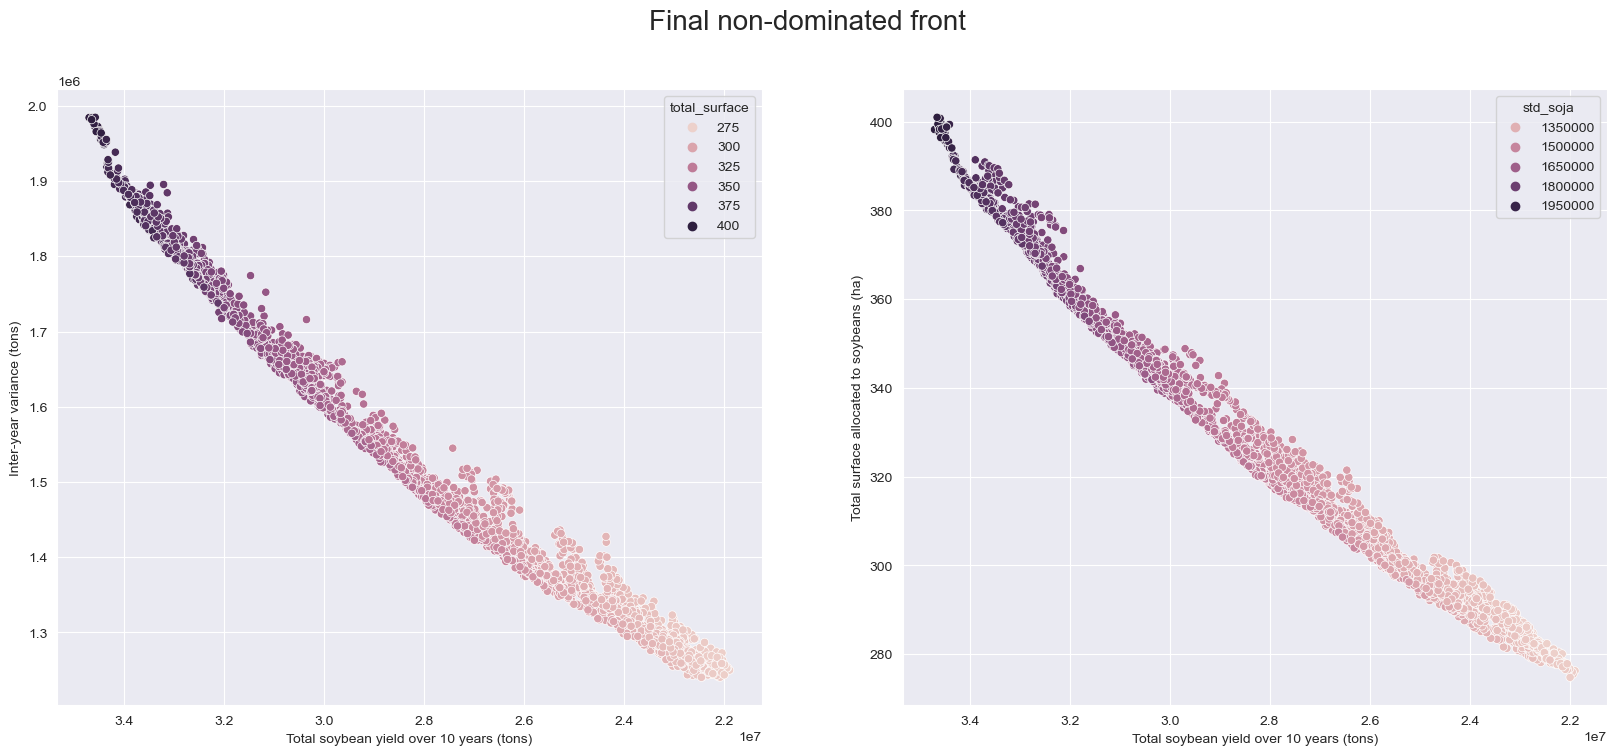

In [50]:
# now, here I need to perform some dark magic to avoid issues with labels
df[fitness_names[0]] = df[fitness_names[0]].values * -1.0

# this plot kinda sucks, though; maybe it's better to have two plots side by side
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121) # 1x2 grid, 1st subplot
ax2 = fig.add_subplot(122) # 1x2 grid, 2nd subplot

sns.scatterplot(data=df, x=fitness_names[0], y=fitness_names[1], hue=fitness_names[2], ax=ax1)
ax1.set_xlabel(names2labels[fitness_names[0]])
ax1.set_ylabel(names2labels[fitness_names[1]])
ax1.invert_xaxis()

sns.scatterplot(data=df, x=fitness_names[0], y=fitness_names[2], hue=fitness_names[1], ax=ax2)
ax2.set_xlabel(names2labels[fitness_names[0]])
ax2.set_ylabel(names2labels[fitness_names[2]])
ax2.invert_xaxis()

fig.suptitle("Final non-dominated front", fontsize=20)

plt.savefig("../results/2024-01-19-soja-allocation-3-objectives-gen520.png", dpi=300)